## Gold Price Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gold_df = pd.read_csv("GOLD.csv")
gold_df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [4]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
Date        512 non-null object
Price       512 non-null int64
Open        512 non-null int64
High        512 non-null int64
Low         512 non-null int64
Vol.        512 non-null object
Change %    512 non-null object
Pred        411 non-null float64
new         512 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


In [7]:
gold_df[gold_df["Pred"].isnull()==True].head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
411,"Dec 11, 2018",31812,31850,31850,31618,10.53K,-0.26%,NaN,195.423493
412,"Dec 12, 2018",31626,31749,31749,31582,7.57K,-0.58%,NaN,44.232664
413,"Dec 13, 2018",31414,31550,31600,31337,8.43K,-0.67%,NaN,127.646233
414,"Dec 14, 2018",31437,31440,31514,31384,6.75K,0.07%,NaN,127.219539
415,"Dec 17, 2018",31501,31369,31530,31291,5.97K,0.20%,NaN,372.603976


In [12]:
def per_num(per):
    return pd.to_numeric(per[:-1])

gold_df["Change %"] = gold_df["Change %"].apply(per_num)
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
Date        512 non-null object
Price       512 non-null int64
Open        512 non-null int64
High        512 non-null int64
Low         512 non-null int64
Vol.        512 non-null object
Change %    512 non-null float64
Pred        411 non-null float64
new         512 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 36.1+ KB


In [34]:
gold_sub = gold_df[["Open","High","Low","Price","Pred","new"]]
gold_sub.head()

,Open,High,Low,Price,Pred,new
0,28400,28482,28025,28060,738.0,117.570740
1,28136,28382,28135,28184,-146.0,295.430176
2,28145,28255,28097,28119,30.0,132.123714
3,28125,28192,27947,27981,357.0,101.298064
4,28060,28146,27981,28007,124.0,112.153318


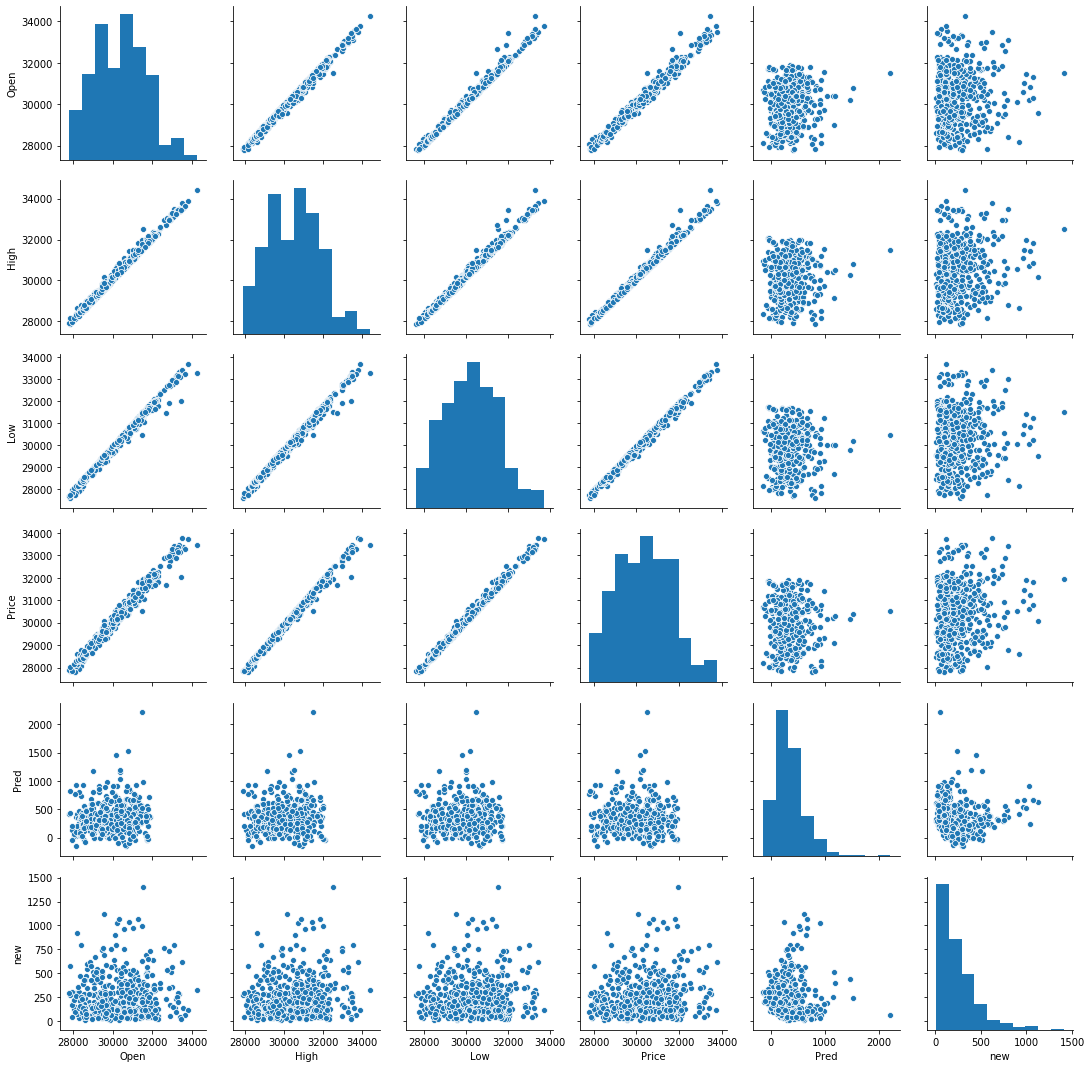

In [35]:
sns.pairplot(gold_sub)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split

X = gold_df[["Open","High","Low","Price"]]
y = gold_df["new"]

regression_model = LinearRegression()
regression_model.fit(X, y)

for idx, col_name in enumerate(X.columns):
    print("The regression coeffient of",col_name,regression_model.coef_[idx])

The regression coeffient of Open -1.0003835018857647
The regression coeffient of High 1.0050377178582268
The regression coeffient of Low -1.017654525897553
The regression coeffient of Price 1.0129382510315263


In [88]:
print("Model score for 'new' column",regression_model.score(X, y))
print("Regression is suitable for the 'new' column")

Model score for 'new' column 0.9999886649319772
Regression is suitable for the 'new' column


In [97]:
X = gold_df[gold_df["Pred"].isnull()==False][["Open","High","Low","Price"]]
y = gold_df[gold_df["Pred"].isnull()==False]["Pred"]

regression_model2 = LinearRegression()
regression_model2.fit(X, y)

print(regression_model.score(X, y))
print("Regression is not suitable")

-0.707058277830283
Regression is not suitable


In [113]:
poly = PolynomialFeatures(degree=3, interaction_only=True)
x_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(x_poly, y)

for idx, col_name in enumerate(X.columns):
    print("The poly regression coeffient of",col_name,poly_model.coef_[idx:idx+4])

The poly regression coeffient of Open [ 0.          2.99998326 -1.00020302 -3.99992829]
The poly regression coeffient of High [ 2.99998326 -1.00020302 -3.99992829  2.00014783]
The poly regression coeffient of Low [-1.00020302e+00 -3.99992829e+00  2.00014783e+00  6.91084277e-09]
The poly regression coeffient of Price [-3.99992829e+00  2.00014783e+00  6.91084277e-09 -1.77170925e-09]


In [107]:
print("Model score for 'Pred' column",poly_model.score(x_poly,y))
print("Polynomial Regression is suitable for the 'Pred' column")


Model score for 'Pred' column 0.9999999999981234
Polynomial Regression is suitable for the 'Pred' column


In [146]:
x_blank = gold_df[gold_df["Pred"].isnull()==True][["Open","High","Low","Price"]]
y_blank = gold_df[gold_df["Pred"].isnull()==False]["Pred"]

x_blank_poly = poly.fit_transform(x_blank)
y_poly_pred = poly_model.predict(x_blank_poly)


mask = gold_df["Pred"].isnull()==True
gold_df.loc[mask,"Pred"] = y_poly_pred
gold_df.info()

In [147]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
Date        512 non-null object
Price       512 non-null int64
Open        512 non-null int64
High        512 non-null int64
Low         512 non-null int64
Vol.        512 non-null object
Change %    512 non-null float64
Pred        512 non-null float64
new         512 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 36.1+ KB


## Infosys Beta Regression

In [13]:
nifty_df = pd.read_csv("nifty50.csv")
stock_df = pd.read_csv("INFY.csv")

nifty_df.head(3)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23


In [15]:
nifty_df['Date'] = pd.to_datetime(nifty_df['Date'])

nifty_df["Day_Perc_Change"] = nifty_df["Close"].pct_change()*100
nifty_df.loc[0,"Day_Perc_Change"]=0
nifty_df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_Perc_Change
0,2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,0.000000
1,2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.707752
2,2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,0.141922
3,2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,-1.010944
4,2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,-0.016438


In [16]:
nifty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 8 columns):
Date                 494 non-null datetime64[ns]
Open                 494 non-null float64
High                 494 non-null float64
Low                  494 non-null float64
Close                494 non-null float64
Shares Traded        494 non-null int64
Turnover (Rs. Cr)    494 non-null float64
Day_Perc_Change      494 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 31.0 KB


In [6]:
stock_df.head(3)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change
0,INFY,EQ,15-May-2017,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,NaN
1,INFY,EQ,16-May-2017,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,0.362566
2,INFY,EQ,17-May-2017,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,-0.230366


In [17]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

stock_df["Day_Perc_Change"] = stock_df["Close Price"].pct_change()*100
stock_df.loc[0,"Day_Perc_Change"]=0
stock_df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change
0,INFY,EQ,2017-05-15,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,0.000000
1,INFY,EQ,2017-05-16,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,0.362566
2,INFY,EQ,2017-05-17,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,-0.230366
3,INFY,EQ,2017-05-18,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,0.939337
4,INFY,EQ,2017-05-19,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,-0.395113


In [18]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 16 columns):
Symbol                    496 non-null object
Series                    496 non-null object
Date                      496 non-null datetime64[ns]
Prev Close                496 non-null float64
Open Price                496 non-null float64
High Price                496 non-null float64
Low Price                 496 non-null float64
Last Price                496 non-null float64
Close Price               496 non-null float64
Average Price             496 non-null float64
Total Traded Quantity     496 non-null int64
Turnover                  496 non-null float64
No. of Trades             496 non-null int64
Deliverable Qty           496 non-null int64
% Dly Qt to Traded Qty    496 non-null float64
Day_Perc_Change           496 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(3), object(2)
memory usage: 62.1+ KB


#### Beta value for the past 90 days

In [48]:
n_date = nifty_df['Date'].iloc[-1] -  pd.to_timedelta(90, unit='d')
mask = nifty_df["Date"]>=n_date
nifty_90 = nifty_df[mask]

nifty_90.head(3)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_Perc_Change
435,2019-02-12,10879.70,10910.90,10823.80,10831.40,292314643,14424.78,-0.527147
436,2019-02-13,10870.55,10891.65,10772.10,10793.65,321958549,15360.98,-0.348524
437,2019-02-14,10786.10,10792.70,10718.75,10746.05,627041405,20797.41,-0.441000


In [49]:
n_date = stock_df['Date'].iloc[-1] -  pd.to_timedelta(90, unit='d')
mask = stock_df["Date"]>=n_date
stock_90 = stock_df[mask]
stock_90 = stock_90[:59]
stock_90.head(3)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change
435,INFY,EQ,2019-02-12,762.80,760.35,760.35,741.00,750.40,750.45,748.38,7310690,5.471189e+09,148513,3259568,44.59,-1.619035
436,INFY,EQ,2019-02-13,750.45,750.10,759.70,743.65,754.00,754.90,753.01,5050182,3.802821e+09,133702,2418277,47.88,0.592978
437,INFY,EQ,2019-02-14,754.90,751.00,753.00,737.25,740.35,740.05,745.60,4610535,3.437611e+09,113149,2466085,53.49,-1.967148


In [68]:
from sklearn import linear_model

X = nifty_90["Day_Perc_Change"].values.reshape(-1,1)
y = stock_90["Day_Perc_Change"].values.reshape(-1,1)

ols=linear_model.LinearRegression()
ols.fit(X, y)

print("Daily Beta for the past 3 months",ols.coef_[0][0])

Daily Beta for the past 3 months 0.22993149085905537


#### Monthly Beta value

In [81]:
nifty_df['Month'] = nifty_df['Date'].dt.month
nifty_df['Year'] = nifty_df['Date'].dt.year
stock_df['Month'] = stock_df['Date'].dt.month
stock_df['Year'] = stock_df['Date'].dt.year

nifty_monthy_ret = []
month_year_grouped = nifty_df.groupby(['Year','Month'])
for y_m,grp in month_year_grouped:
    month_ret = grp["Day_Perc_Change"].mean()
    nifty_monthy_ret.append(month_ret)

stock_monthy_ret = []
month_year_grouped = stock_df.groupby(['Year','Month'])
for y_m,grp in month_year_grouped:
    month_ret = grp["Day_Perc_Change"].mean()
    stock_monthy_ret.append(month_ret)

In [94]:
from sklearn import linear_model

nifty_monthy_ret = np.array(nifty_monthy_ret)
stock_monthy_ret = np.array(stock_monthy_ret)

X = nifty_monthy_ret.reshape(-1,1)
y = stock_monthy_ret.reshape(-1,1)

ols=linear_model.LinearRegression()
ols.fit(X, y)

print("Monthly Beta value is ",ols.coef_[0][0])

Monthly Beta value is  1.4649033220918781


In [95]:
# The above values indicates that the stock was less volatile 
# in the last 3 months since its beta value if far less than 1.

# Also the monthly beta values shows that on an monthy return 
# basis over the span of the whole data the beta value was greater
# than one idicating that on the overall data the stock was more volatile.